In [1]:
import pandas as pd
import geopandas as gpd
#from geopandas.tools import geocode
import matplotlib.pyplot as plt

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/municipio_sp.shp')

In [3]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [4]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [5]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Spatial join to get only the points inside polygon
gdf_agencias_sp_points_join = gpd.sjoin(gdf_agencias_sp_points, sp_shp, predicate='within')

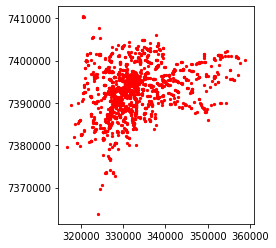

In [7]:
gdf_agencias_sp_points_join.plot(marker='o', color='red', markersize=5)

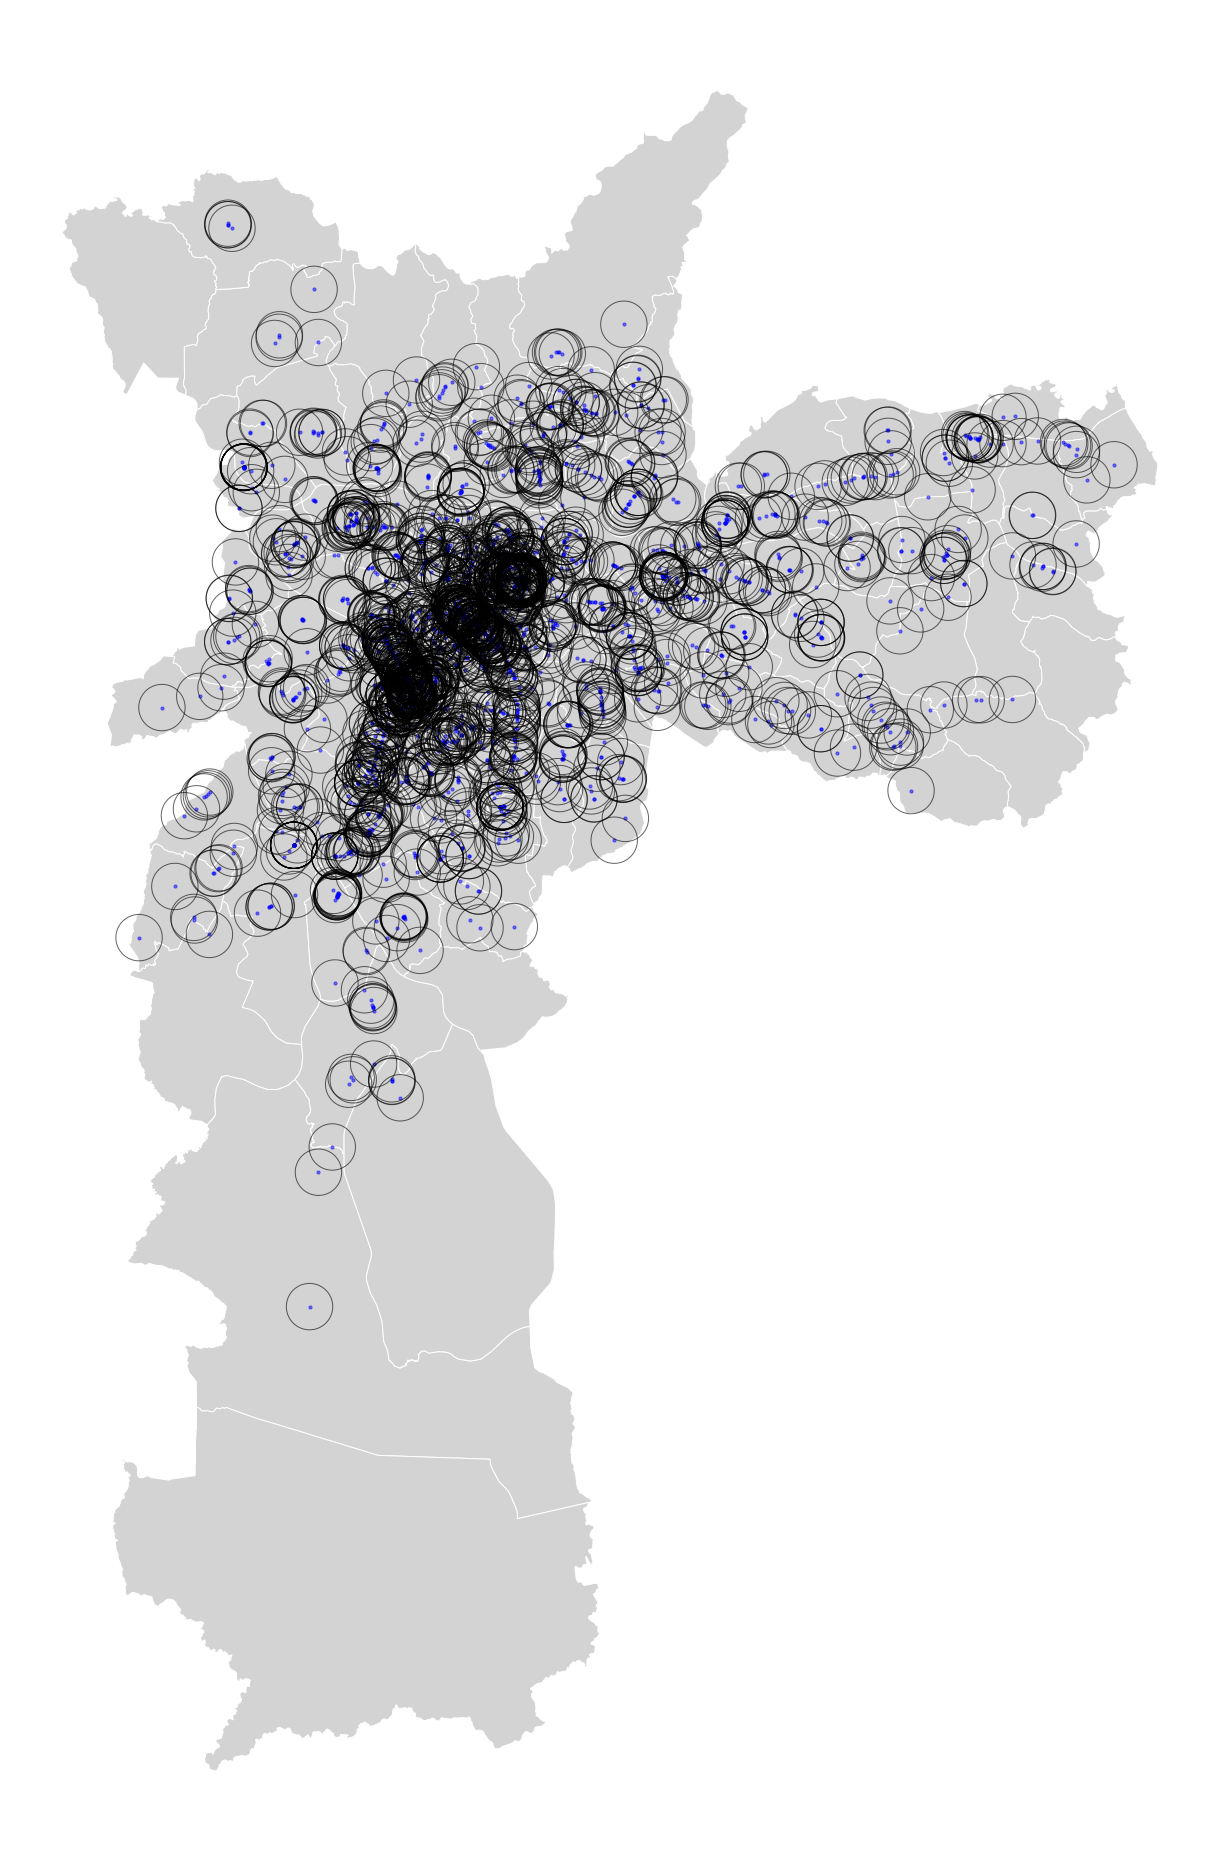

In [25]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
gdf_agencias_sp_points_join.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
gdf_agencias_sp_points_join.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')

ax.axis("off")
plt.show()